In [2]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#pre-processing

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
import pickle

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud
# from spellchecker import SpellChecker

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [4]:
import random

In [5]:
def loadDataTest(path):
    df = pd.read_csv(path, thousands = ',')
    
    return df

## Distribution of start ratings

### Facebook

In [6]:
#adding column in the df for rating category
def add_review_sentiment(reviews_without_sentiment):
    rating_category = []

    for index, row in reviews_without_sentiment.iterrows():
        if row['reviewer_ratings'] > 3:
            rating_category.append("positive")
        if row['reviewer_ratings'] < 3:
            rating_category.append("negative")
        if row['reviewer_ratings'] == 3:
            rating_category.append("neutral")
    reviews_without_sentiment['rating_category'] = rating_category
    
    return reviews_without_sentiment
    

In [7]:
reviews = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/reviews_Google Photos.csv")
reviews_with_sentiment = add_review_sentiment(reviews)

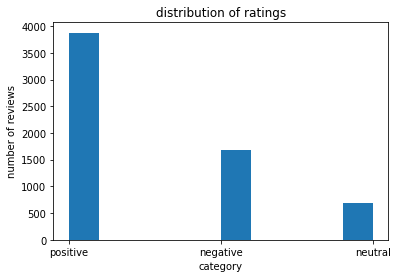

In [8]:
plt.hist(reviews['rating_category'])
plt.ylabel("number of reviews")
plt.xlabel("category")
plt.title("distribution of ratings")
plt.show()

## Analysis of main_info files

In [16]:
df_native_apps = loadDataTest("Native_android_apps_reviews/main_info_new.csv")
df_cross_apps = loadDataTest("Xamarin_and_React_apps_reviews/main_info.csv")

### number of ratings for each popularity category

In [17]:
df_native_apps["number_of_downloads_category"] = df_native_apps.apply (lambda row: label_popularity(row), axis=1)
df_cross_apps["number_of_downloads_category"] = df_cross_apps.apply (lambda row: label_popularity(row), axis=1)

In [18]:
avg_no_of_ratings(df_native_apps)

[7322.0, 57789.26666666667, 1764889.4324324324, 6868196.642857143]

In [19]:
avg_no_of_ratings(df_cross_apps)

[747.7741935483871, 30161.1, 2020923.5, 54615198.5]

In [21]:
avg_no_of_ratings(df_cross_apps)[0:3]

[747.7741935483871, 30161.1, 2020923.5]

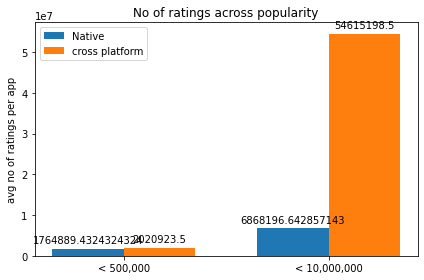

In [24]:
labels = ['< 500,000', '< 10,000,000']
#           , '< 100,000,000']
#           , '> 100,000,000']
native_apps = avg_no_of_ratings(df_native_apps)[2:]
cross_platform = avg_no_of_ratings(df_cross_apps)[2:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, native_apps, width, label='Native')
rects2 = ax.bar(x + width/2, cross_platform, width, label='cross platform')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('avg no of ratings per app')
ax.set_title('No of ratings across popularity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
def label_popularity (row):
    if row['number_of_downloads'] == '10,000+' or row['number_of_downloads'] == '100,000+' :
        return 1
    if row['number_of_downloads'] == '500,000+' or row['number_of_downloads'] == '5,000,000+' or row['number_of_downloads'] == '1,000,000+':
        return 2
    if row['number_of_downloads'] == '10,000,000+' or row['number_of_downloads'] == '100,000,000+' or row['number_of_downloads'] == '50,000,000+':
        return 3
    if row['number_of_downloads'] == '5,000,000,000+' or row['number_of_downloads'] == '500,000,000+' or row['number_of_downloads'] == '1,000,000,000+':
        return 4
    return 0

In [15]:
def avg_no_of_ratings(df):
    num_apps_popularity = [0,0,0,0]
    num_rating_popularity = [0,0,0,0]
    avg_rating_popularity = [0,0,0,0]

    for index, row in df.iterrows():
        if row['number_of_downloads_category'] == 1:
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 2:
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 3:
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 4:
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

#     print(num_rating_popularity)
#     print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


## Word Cloud

#### Manual cleaning, Stop word removal, punctuation removal, stemming

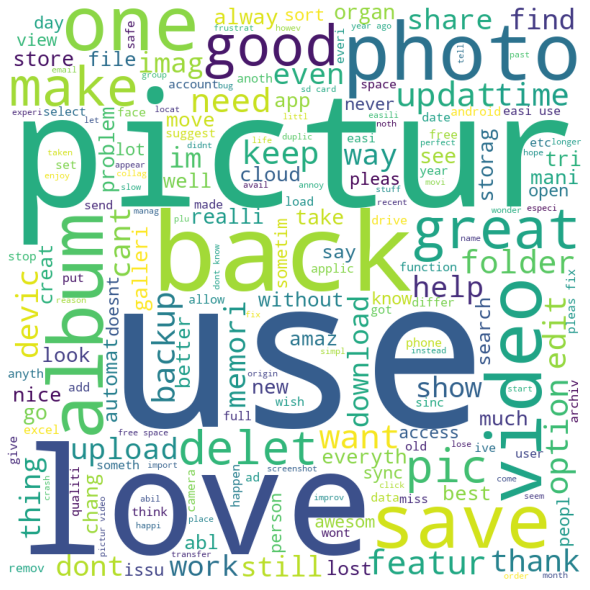

In [35]:
loadDataTest("Native_android_apps_reviews/nativeAppsReviews/reviews_Google Photos.csv")
Cleaned_reviews = textCleaning_with_appname(reviews, "Google Photos")
get_word_cloud(Cleaned_reviews).show()


In [33]:
def textCleaning(df):

    df2 = df.copy()
    all_stop_words = set(stopwords.words('english'))
    all_stop_words.update({"app", "phone"} )
    stop_words = all_stop_words
    ps = PorterStemmer()
    
    df3 = pd.DataFrame(columns=['review'])
    previous_app_name = ""
    for index, row in df2.iterrows():
    
        app_name = row['app_name']
        if(app_name != previous_app_name):
            stop_words = all_stop_words
            more_words = get_more_words(app_name)
            previous_app_name = app_name
            stop_words.update(more_words)
        
        row['review'] = row['review'].lower()
        row['review'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review'])
        row['review'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review'])
        row['review'] = word_tokenize(row['review'])
            
        #stemming and stop word removal
        correct = ""
        for w in row['review']:    
            if (w in stop_words or len(w) == 1):
                continue
            word = ps.stem(word)
            correct += " " + word
              
        df3.loc[index] = [correct]
        
    return df3

def textCleaning_with_appname(df, app_name):

    df2 = df.copy()
    all_stop_words = set(stopwords.words('english'))
    all_stop_words.update({"app", "phone"})
    all_stop_words.update(get_more_words(app_name))
    ps = PorterStemmer()
    
    df3 = pd.DataFrame(columns=['review_body'])
    previous_app_name = ""
    for index, row in df2.iterrows():
        
        row['review_body'] = row['review_body'].lower()
        row['review_body'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review_body'])
        row['review_body'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review_body'])
        row['review_body'] = word_tokenize(row['review_body'])
            
        #stemming and stop word removal
        correct = ""
        for w in row['review_body']:    
            if (w in all_stop_words or len(w) == 1):
                continue
            w = ps.stem(w)
            correct += " " + w
              
        df3.loc[index] = [correct]
        
    return df3

In [31]:
 def get_word_cloud(Cleaned_reviews):
    comment_words = " "
    for index, row in Cleaned_reviews.iterrows():
        comment_words = comment_words+Cleaned_reviews.loc[index]['review_body'] + " "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
    #                 stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    return plt

In [32]:
def get_more_words(app_name):
    new_words = set()
    new_words.add(app_name)
    new_words.add(app_name.lower())
    
    name_list = app_name.split()
    initials = ""
    for words_in_name in name_list:
        new_words.add(words_in_name)
        new_words.add(words_in_name.lower())
        initials += words_in_name[0]
        
    new_words.add(initials.lower())
    new_words.add(initials.upper())

    return new_words
    
    

In [8]:
app_name = "sample"
reviews_with_sentiment.to_csv(r"C:\Users\gupta\Documents\Spring2020\CS540\Project\android_review_crawler\android_review_crawler\Native_android_apps_reviews\nativeAppsReviews_AG\reviews_" + str(app_name) + ".csv", sep=",",
                  index_label="index")